## Assignment 12: TensorFlow and Keras Build various MLP architectures for MNIST dataset

### Objective:

1. Building Models with 3 different architectures:

  i) 2-Hidden layer architecture (784-472-168-10 architecture)

  ii) 3-Hidden layer architecture (784-352-164-124-10 architecture)

  iii) 5-Hidden layer architecture (784-216-170-136-80-38-10 architecture)


2. Train-Test error plot


3. Activation='relu'+ Adam Optimizer+Batch_Normalization +Drop_out

In [2]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [4]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of testing examples : 10000 and each image is of shape (28, 28)


In [6]:
# Each image we have is a (28*28) vector
# Let's convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of testing examples : 10000 and each image is of shape (784)


In [8]:
# Let's print the first entry
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [9]:
# Each cell of above matrix is having a value between 0-255
# before applying machine learning algorithms, let's normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [11]:
# Let's print first entry after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [13]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# let's convert this into a 10 dimensional vector as it is needed for MLPs

y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)

print("After converting, class label of first image: ",y_train[0])

Class label of first image : 5
After converting, class label of first image:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.initializers import he_normal

In [15]:
# Setting model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# 1) 2-Hidden layer architecture (784-472-168-10 architecture)

## 1.1 MLP + ReLU + ADAM

In [16]:
model_relu = Sequential()
model_relu.add(Dense(472, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(168, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history11 = model_relu.fit(X_train, y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 472)               370520    
_________________________________________________________________
dense_2 (Dense)              (None, 168)               79464     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1690      
Total params: 451,674
Trainable params: 451,674
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.2293 - accuracy: 0.9337 - val_loss: 0.1071 - val_accuracy: 0.9665
Epoch 2/20
60000/60000 [==============================]

Test score: 0.10199347244282822
Test accuracy: 0.979200005531311


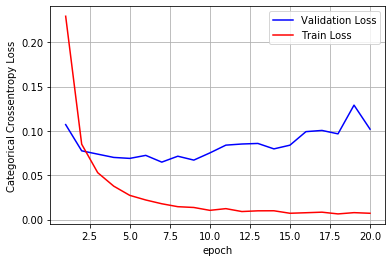

In [20]:
score = model_relu.evaluate(X_test, y_test, verbose=0) 
score1=score[0]
score2=score[1]
train_acc1=history11.history['accuracy']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax11 = plt.subplots(1,1)
ax11.set_xlabel('epoch') ; ax11.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy11 = history11.history['val_loss']
ty11 = history11.history['loss']
plt_dynamic(x, vy11, ty11, ax11)

## 1.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer

In [21]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(472, activation='relu', 
                      input_shape=(input_dim,),
                      kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(168, activation='relu', 
                      kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 472)               370520    
_________________________________________________________________
batch_normalization_1 (Batch (None, 472)               1888      
_________________________________________________________________
dense_5 (Dense)              (None, 168)               79464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 168)               672       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1690      
Total params: 454,234
Trainable params: 452,954
Non-trainable params: 1,280
_________________________________________________________________


In [22]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history12 = model_batch.fit(X_train, y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.1890 - accuracy: 0.9433 - val_loss: 0.0932 - val_accuracy: 0.9721
Epoch 2/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0712 - accuracy: 0.9788 - val_loss: 0.0890 - val_accuracy: 0.9709
Epoch 3/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0453 - accuracy: 0.9858 - val_loss: 0.0792 - val_accuracy: 0.9743
Epoch 4/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0865 - val_accuracy: 0.9746
Epoch 5/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.0268 - accuracy: 0.9917 - val_loss: 0.0709 - val_accuracy: 0.9789
Epoch 6/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.0910 - val_accuracy: 0.9747
Epoch 7/20
60000/60000 [==============================] - 9s 

Test score: 0.09108898642615058
Test accuracy: 0.9800000190734863


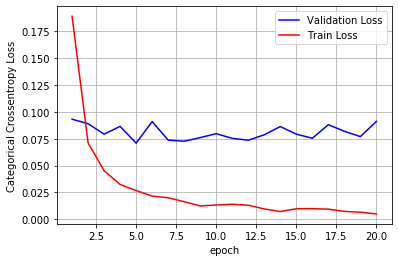

In [28]:
score = model_batch.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
score3=score[0]
score4=score[1]
train_acc2=history12.history['accuracy']

fig,ax12 = plt.subplots(1,1)
ax12.set_xlabel('epoch') ; ax12.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy12 = history12.history['val_loss']
ty12 = history12.history['loss']
plt_dynamic(x, vy12, ty12, ax12)

## 1.3 MLP + Dropout + AdamOptimizer

In [24]:
from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(472, activation='relu',
                     input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(168, activation='relu',
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 472)               370520    
_________________________________________________________________
batch_normalization_3 (Batch (None, 472)               1888      
_________________________________________________________________
dropout_1 (Dropout)          (None, 472)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 168)               79464     
_________________________________________________________________
batch_normalization_4 (Batch (None, 168)               672       
_________________________________________________________________
dropout_2 (Dropout)          (None, 168)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [25]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history13 = model_drop.fit(X_train, y_train,
                         batch_size=batch_size,
                         epochs=nb_epoch, verbose=1,
                         validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 175us/step - loss: 0.4305 - accuracy: 0.8688 - val_loss: 0.1433 - val_accuracy: 0.9556
Epoch 2/20
60000/60000 [==============================] - 10s 175us/step - loss: 0.2054 - accuracy: 0.9384 - val_loss: 0.1075 - val_accuracy: 0.9667
Epoch 3/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.1641 - accuracy: 0.9507 - val_loss: 0.0917 - val_accuracy: 0.9695
Epoch 4/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.1362 - accuracy: 0.9586 - val_loss: 0.0856 - val_accuracy: 0.9727
Epoch 5/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.1198 - accuracy: 0.9634 - val_loss: 0.0748 - val_accuracy: 0.9769
Epoch 6/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.1105 - accuracy: 0.9656 - val_loss: 0.0707 - val_accuracy: 0.9773
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.055900052050140224
Test accuracy: 0.984000027179718


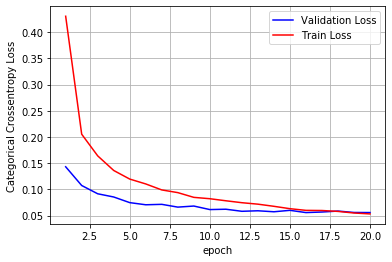

In [29]:
score = model_drop.evaluate(X_test, y_test, verbose=0) 
score5=score[0]
score6=score[1]
train_acc3=history13.history['accuracy']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax13 = plt.subplots(1,1)
ax13.set_xlabel('epoch') ; ax13.set_ylabel('Categorical Crossentropy Loss')

vy13 = history13.history['val_loss']
ty13 = history13.history['loss']
plt_dynamic(x, vy13, ty13, ax13)

# 2) 3-Hidden layer architecture (784-352-164-124 architecture)

## 2.1 MLP + ReLU + ADAM

In [27]:
model_relu = Sequential()
model_relu.add(Dense(352, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(164, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history21 = model_relu.fit(X_train, y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, y_test))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 352)               276320    
_________________________________________________________________
dense_11 (Dense)             (None, 164)               57892     
_________________________________________________________________
dense_12 (Dense)             (None, 124)               20460     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1250      
Total params: 355,922
Trainable params: 355,922
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.2361 - accuracy: 0.9291 - val_loss: 0.1118 - val_accuracy: 0.9678
Epoch 2/20
60000/60000 [===================

Test score: 0.10229123631868356
Test accuracy: 0.9789999723434448


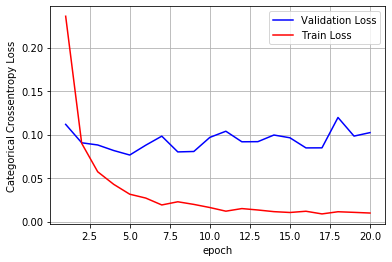

In [30]:
score = model_relu.evaluate(X_test, y_test, verbose=0) 
score7=score[0]
score8=score[1]
train_acc4=history21.history['accuracy']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax21 = plt.subplots(1,1)
ax21.set_xlabel('epoch') ; ax21.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy21 = history21.history['val_loss']
ty21 = history21.history['loss']
plt_dynamic(x, vy21, ty21, ax21)

## 2.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer

In [31]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_relu.add(Dense(352, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_relu.add(Dense(164, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

In [33]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history22 = model_batch.fit(X_train, y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.4919 - accuracy: 0.8541 - val_loss: 0.3529 - val_accuracy: 0.9093
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.3065 - accuracy: 0.9117 - val_loss: 5.3663 - val_accuracy: 0.4360
Epoch 3/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.2863 - accuracy: 0.9199 - val_loss: 2.4895 - val_accuracy: 0.5634
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.2774 - accuracy: 0.9216 - val_loss: 0.8210 - val_accuracy: 0.7968
Epoch 5/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2714 - accuracy: 0.9236 - val_loss: 1.0564 - val_accuracy: 0.7441
Epoch 6/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.2681 - accuracy: 0.9251 - val_loss: 0.5624 - val_accuracy: 0.8672
Epoch 7/20
60000/60000 [==============================] - 5s 91us/s

In [34]:
model_batch.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_5 (Batch (None, 784)               3136      
_________________________________________________________________
batch_normalization_6 (Batch (None, 784)               3136      
_________________________________________________________________
batch_normalization_7 (Batch (None, 784)               3136      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                7850      
Total params: 17,258
Trainable params: 12,554
Non-trainable params: 4,704
_________________________________________________________________


Test score: 0.6022788046717644
Test accuracy: 0.8690000176429749


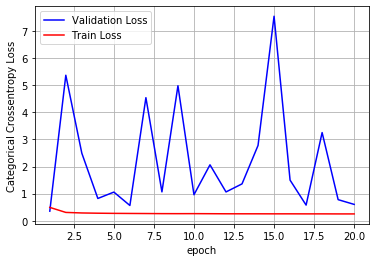

In [35]:
score = model_batch.evaluate(X_test, y_test, verbose=0) 
score9=score[0]
score10=score[1]
train_acc5=history22.history['accuracy']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax22 = plt.subplots(1,1)
ax22.set_xlabel('epoch') ; ax22.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy22 = history22.history['val_loss']
ty22 = history22.history['loss']
plt_dynamic(x, vy22, ty22, ax22)

## 2.3 MLP + Dropout + AdamOptimizer

In [36]:
from keras.layers import Dropout

model_drop = Sequential()
model_relu.add(Dense(352, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))

model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(164, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

                                                    
model_relu.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

In [37]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history23 = model_drop.fit(X_train, y_train,
                         batch_size=batch_size,
                         epochs=nb_epoch, verbose=1,
                         validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 135us/step - loss: 1.3556 - accuracy: 0.5682 - val_loss: 0.4809 - val_accuracy: 0.8837
Epoch 2/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.8602 - accuracy: 0.7193 - val_loss: 0.4449 - val_accuracy: 0.8909
Epoch 3/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.8353 - accuracy: 0.7277 - val_loss: 0.4308 - val_accuracy: 0.8929
Epoch 4/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.8351 - accuracy: 0.7289 - val_loss: 0.4315 - val_accuracy: 0.8932
Epoch 5/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.8302 - accuracy: 0.7289 - val_loss: 0.4225 - val_accuracy: 0.8955
Epoch 6/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.8301 - accuracy: 0.7298 - val_loss: 0.4249 - val_accuracy: 0.8951
Epoch 7/20
60000/60000 [==============================] - 8s 1

In [38]:
model_drop.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_8 (Batch (None, 784)               3136      
_________________________________________________________________
dropout_3 (Dropout)          (None, 784)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 784)               3136      
_________________________________________________________________
dropout_4 (Dropout)          (None, 784)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_5 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)               

Test score: 0.40186178770065306
Test accuracy: 0.8967999815940857


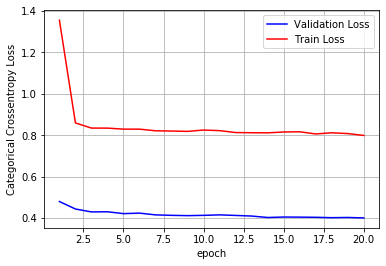

In [40]:
score = model_drop.evaluate(X_test, y_test, verbose=0)
score11=score[0]
score12=score[1]
train_acc6=history23.history['accuracy']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax23 = plt.subplots(1,1)
ax23.set_xlabel('epoch') ; ax23.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy23 = history23.history['val_loss']
ty23 = history23.history['loss']
plt_dynamic(x, vy23, ty23, ax23)

# 3) 5-Hidden layer architecture (784-216-170-136-80-38-10 architecture)

## 3.1 MLP + ReLU + ADAM

In [41]:
model_relu = Sequential()
model_relu.add(Dense(216, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(136, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(80, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(38, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history31 = model_relu.fit(X_train, y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, y_test))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 216)               169560    
_________________________________________________________________
dense_23 (Dense)             (None, 170)               36890     
_________________________________________________________________
dense_24 (Dense)             (None, 136)               23256     
_________________________________________________________________
dense_25 (Dense)             (None, 80)                10960     
_________________________________________________________________
dense_26 (Dense)             (None, 38)                3078      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                390       
Total params: 244,134
Trainable params: 244,134
Non-trainable params: 0
________________________________________________

Test score: 0.11039771217970347
Test accuracy: 0.9750999808311462


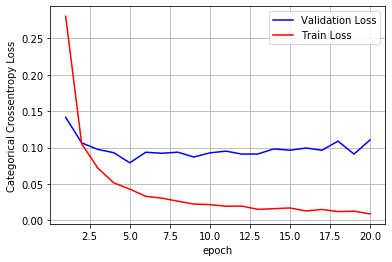

In [43]:
score = model_relu.evaluate(X_test, y_test, verbose=0) 
score13=score[0]
score14=score[1]
train_acc7=history31.history['accuracy']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax31 = plt.subplots(1,1)
ax31.set_xlabel('epoch') ; ax31.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy31 = history31.history['val_loss']
ty31 = history31.history['loss']
plt_dynamic(x, vy31, ty31, ax31)

## 3.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer

In [44]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_relu.add(Dense(216, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(136, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
model_relu.add(Dense(80, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(38, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

In [45]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history32 = model_batch.fit(X_train, y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.4971 - accuracy: 0.8524 - val_loss: 14.5068 - val_accuracy: 0.0992
Epoch 2/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.3063 - accuracy: 0.9121 - val_loss: 14.6796 - val_accuracy: 0.0892
Epoch 3/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.2869 - accuracy: 0.9177 - val_loss: 14.4918 - val_accuracy: 0.1009
Epoch 4/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.2753 - accuracy: 0.9219 - val_loss: 14.2871 - val_accuracy: 0.1136
Epoch 5/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.2730 - accuracy: 0.9228 - val_loss: 14.4644 - val_accuracy: 0.1026
Epoch 6/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.2678 - accuracy: 0.9259 - val_loss: 14.2887 - val_accuracy: 0.1135
Epoch 7/20
60000/60000 [==============================]

In [46]:
model_batch.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_11 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_12 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_13 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_14 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_15 (Batc (None, 784)               3136      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                7850      
Total params: 23,530
Trainable params: 15,690
Non-trainable params: 7,840
______________________________________________

Test score: 13.260629919433594
Test accuracy: 0.10159999877214432


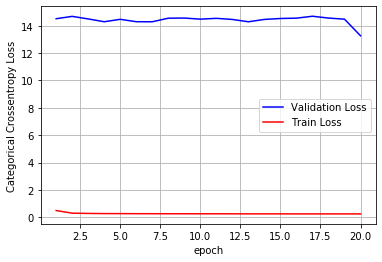

In [47]:
score = model_batch.evaluate(X_test, y_test, verbose=0) 
score15=score[0]
score16=score[1]
train_acc8=history32.history['accuracy']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax32 = plt.subplots(1,1)
ax32.set_xlabel('epoch') ; ax32.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy32 = history32.history['val_loss']
ty32 = history32.history['loss']
plt_dynamic(x, vy32, ty32, ax32)

## 3.3 MLP + Dropout + AdamOptimizer

In [48]:
from keras.layers import Dropout

model_drop = Sequential()
model_relu.add(Dense(216, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
                                                    
model_relu.add(Dense(136, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(80, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
                                                    
model_relu.add(Dense(38, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

In [49]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history33 = model_drop.fit(X_train, y_train,
                         batch_size=batch_size,
                         epochs=nb_epoch, verbose=1,
                         validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 249us/step - loss: 2.1432 - accuracy: 0.3119 - val_loss: 1.0702 - val_accuracy: 0.8327
Epoch 2/20
60000/60000 [==============================] - 13s 220us/step - loss: 1.6152 - accuracy: 0.4400 - val_loss: 0.9769 - val_accuracy: 0.8457
Epoch 3/20
60000/60000 [==============================] - 13s 220us/step - loss: 1.5940 - accuracy: 0.4475 - val_loss: 0.9606 - val_accuracy: 0.8457
Epoch 4/20
60000/60000 [==============================] - 14s 231us/step - loss: 1.5865 - accuracy: 0.4529 - val_loss: 0.9527 - val_accuracy: 0.8472
Epoch 5/20
60000/60000 [==============================] - 12s 207us/step - loss: 1.5784 - accuracy: 0.4535 - val_loss: 0.9404 - val_accuracy: 0.8495
Epoch 6/20
60000/60000 [==============================] - 13s 221us/step - loss: 1.5918 - accuracy: 0.4486 - val_loss: 0.9414 - val_accuracy: 0.8485
Epoch 7/20
60000/60000 [==============================] 

In [50]:
model_drop.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_16 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_6 (Dropout)          (None, 784)               0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_7 (Dropout)          (None, 784)               0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_8 (Dropout)          (None, 784)               0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 784)              

Test score: 0.923618637752533
Test accuracy: 0.8496000170707703


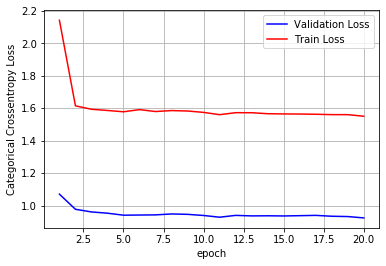

In [53]:
score = model_drop.evaluate(X_test, y_test, verbose=0) 
score17=score[0]
score18=score[1]
train_acc9=history33.history['accuracy']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax33 = plt.subplots(1,1)
ax33.set_xlabel('epoch') ; ax33.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy33 = history33.history['val_loss']
ty33 = history33.history['loss']
plt_dynamic(x, vy33, ty33, ax33)

## Final Summary:

In [62]:
from prettytable import PrettyTable

models=['2_hidden_layer MLP+ReLu+Adam',
        '2_hidden_layer MLP+Relu+adam+BN',
        '2_hidden_layer MLP+reLu+Adam+BN+Drop-out',
       '3_hidden_layer MLP+ReLu+Adam',
        '3_hidden_layer MLP+Relu+adam+BN',
        '3_hidden_layer MLP+reLu+Adam+BN+Drop-out',
       '5_hidden_layer MLP+ReLu+Adam',
        '5_hidden_layer MLP+Relu+adam+BN',
        '5_hidden_layer MLP+reLu+Adam+BN+Drop-out']

training_accuracy=[np.mean(train_acc1),np.mean(train_acc2),np.mean(train_acc3),np.mean(train_acc4),
                   np.mean(train_acc5),np.mean(train_acc6),np.mean(train_acc7),np.mean(train_acc8),
                   np.mean(train_acc9)]

test_score=[score1,score3,score5,score7,score9,score11,score13,score15,
           score17]

test_accuracy=[score2,score4,score6,score8,score10,score12,score14,
              score16,
              score18]
INDEX = [1,2,3,4,5,6,7,8,9]

# Initializing prettytable
Model_Performance = PrettyTable()
# Adding columns
Model_Performance.add_column("INDEX.",INDEX)
Model_Performance.add_column("MODEL_NAME",models)
Model_Performance.add_column("TRAINING ACCURACY",np.around(training_accuracy,2))
Model_Performance.add_column("TESTING ACCURACY",np.around(test_accuracy,2))
Model_Performance.add_column("TEST SCORE",np.around(test_score,2))

# Printing the Model_Performance
print(Model_Performance)

+--------+------------------------------------------+-------------------+------------------+------------+
| INDEX. |                MODEL_NAME                | TRAINING ACCURACY | TESTING ACCURACY | TEST SCORE |
+--------+------------------------------------------+-------------------+------------------+------------+
|   1    |       2_hidden_layer MLP+ReLu+Adam       |        0.99       |       0.98       |    0.1     |
|   2    |     2_hidden_layer MLP+Relu+adam+BN      |        0.99       |       0.98       |    0.09    |
|   3    | 2_hidden_layer MLP+reLu+Adam+BN+Drop-out |        0.97       |       0.98       |    0.06    |
|   4    |       3_hidden_layer MLP+ReLu+Adam       |        0.99       |       0.98       |    0.1     |
|   5    |     3_hidden_layer MLP+Relu+adam+BN      |        0.92       |       0.87       |    0.6     |
|   6    | 3_hidden_layer MLP+reLu+Adam+BN+Drop-out |        0.73       |       0.9        |    0.4     |
|   7    |       5_hidden_layer MLP+ReLu+Adam 